### Codio Activity 16.3: Fitting Models with Kernel Functions

This assignment focuses on using kernel functions like those shown in the lectures and comparing the resulting decision boundaries.  You will again use the wine data, first by applying a polynomial kernel function to the data and then fitting a `LogisticRegression` estimator on the transformed data.  Using a similar approach to the last assignment, you will visualize the decision boundaries that result from the kernel functions.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import seaborn as sns

#### The Data

The wine data is loaded, subset to `total_phenols` and `color_intensity`, and split into train/test sets below.  

In [15]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [24]:
# X_train,X_test,y_train,y_test = train_test_split(X[['total_phenols','color_intensity']],y,random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X[['total_phenols', 'color_intensity']].values, y, random_state = 42)

### Problem 1

#### Logistic Regression with Linear Kernel

Below, you are provided two functions -- `Kernel_matrix` and `evaluate_kernel_model` -- that are taken from the lectures.  Use these functions together with the function `linear_kernel` to determine the following variables:

```
- linear_kernel_matrix: Create Kernel Matrix using linear_kernel_function and X_train
- linear_logistic: Fit a LogisticRegression model (using max_iter=1000) on the Kernel Matrix and y_train
- linear_predictions: Evaluate the model using evaluate_kernel_model and X_train, X_test
```

In [25]:
def Kernel_matrix(kfunc, X):
    N, _ = X.shape
    K = np.empty((N, N))
    for i in range(N):
        for j in range(N):
            K[i, j] = kfunc(X[i, :], X[j, :])
    return K

In [26]:
def evaluate_kernel_model(model, kfunc, X_train, X_test):
    N1, _ = X_train.shape
    N2, _ = X_test.shape
    
    K = np.empty((N2, N1))
    for i in range(N2):
        for j in range(N1):
            K[i, j] = kfunc(X_train[j, :], X_test[i, :])
    return model.predict(K)

In [27]:
def linear_kernel_function(x, z):
    return np.dot(x, z)

In [28]:
linear_kernel_matrix = ''
linear_logistic = ''
linear_predictions = ''

linear_kernel_matrix = Kernel_matrix(linear_kernel_function, X_train)

linear_logistic = LogisticRegression(max_iter=1000).fit(linear_kernel_matrix, y_train)

linear_predictions = evaluate_kernel_model(linear_logistic, linear_kernel_function, X_train, X_test)
print(linear_predictions[:10])

[0 0 2 0 0 0 1 2 1 2]


(2.0, 10.0)

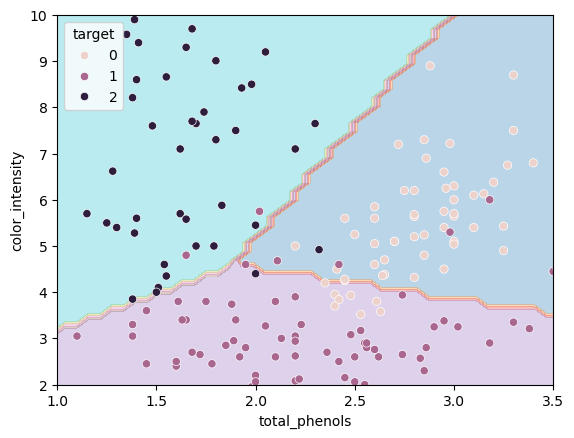

In [29]:
xx = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 50)
yy = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 50)
XX, YY = np.meshgrid(xx, yy)

grid = np.c_[XX.ravel(), YY.ravel()]
labels = evaluate_kernel_model(linear_logistic, linear_kernel_function, X_train, grid)

plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X, x = 'total_phenols', y = 'color_intensity', hue = y)
plt.xlim(1, 3.5)
plt.ylim(2, 10)

### Problem 2

#### Logistic Regression with Quadratic Kernel

Now, complete the `quadratic_kernel_function` below to implement a polynomial kernel of degree 2 on the input data similar to that of the `linear_kernel_function`.  Then, use the quadratic kernel to generate a `quadratic_kernel_matrix` object, and fit a logistic model as `quadratic_logistic` below -- to avoid a convergence warning set `max_iter = 1000`.  Make predictions as `quadratic_predictions` and uncomment the code to visualize the resulting decision boundary. 

In [30]:
def quadratic_kernel_function(x, z):
    return (np.dot(x, z) + 1) ** 2
quadratic_kernel_matrix = Kernel_matrix(quadratic_kernel_function, X_train)

quadratic_logistic = LogisticRegression(max_iter=1000).fit(quadratic_kernel_matrix, y_train)

quadratic_predictions = evaluate_kernel_model(quadratic_logistic, quadratic_kernel_function, X_train, X_test)### END SOLUTION

print(quadratic_predictions[:10])

[0 0 2 0 0 0 1 2 1 2]


/opt/miniconda3/envs/Linlin/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


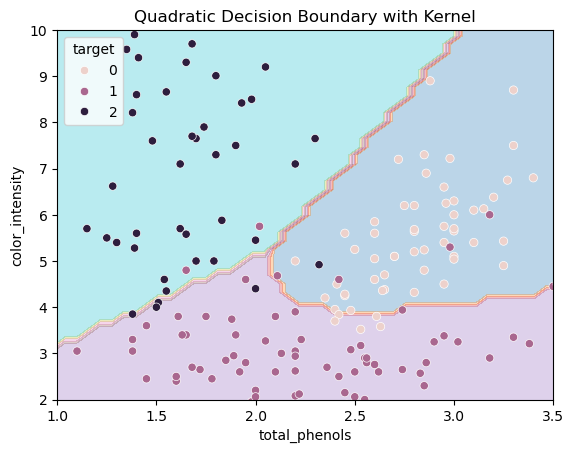

In [31]:
labels = evaluate_kernel_model(quadratic_logistic, quadratic_kernel_function, X_train, grid)

plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X, x = 'total_phenols', y = 'color_intensity', hue = y)
plt.xlim(1, 3.5)
plt.ylim(2, 10)
plt.title('Quadratic Decision Boundary with Kernel');

### Problem 3

#### Logistic Regression with Quintic Kernel

Finally, complete the function `quintic_kernel_function` below that creates a polynomial kernel of degree 5.  Use this to create the `quintic_kernel_matrix`, `quintic_logistic`, and `quintic_predictions`.  

**NOTE**: To avoid convergence warnings here, set the `max_iter = 10_000` in your `quintic_logistic` estimator.

Uncomment the code to visualize the new decision boundary.

In [32]:
def quintic_kernel_function(x, z):
    return (np.dot(x, z) + 1) ** 5
quintic_kernel_matrix = Kernel_matrix(quintic_kernel_function, X_train)

quintic_logistic = LogisticRegression(max_iter=10000).fit(quintic_kernel_matrix, y_train)

quintic_predictions = evaluate_kernel_model(quintic_logistic, quintic_kernel_function, X_train, X_test)### END SOLUTION

print(quintic_predictions[:10])

[0 0 2 0 1 0 1 2 1 2]


/opt/miniconda3/envs/Linlin/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


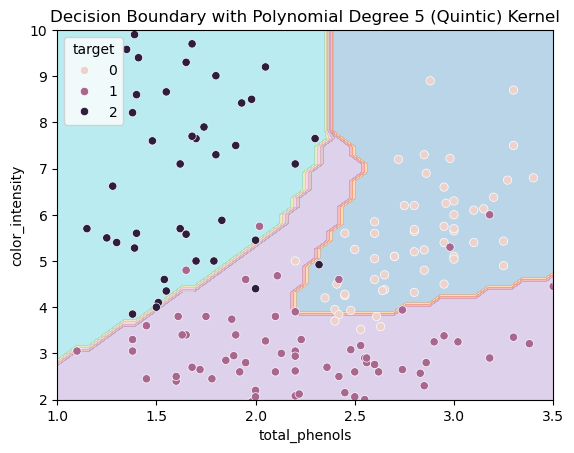

In [33]:
labels = evaluate_kernel_model(quintic_logistic, quintic_kernel_function, X_train, grid)
plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X, x = 'total_phenols', y = 'color_intensity', hue = y)
plt.xlim(1, 3.5)
plt.ylim(2, 10)
plt.title('Decision Boundary with Polynomial Degree 5 (Quintic) Kernel');

### Problem 4

#### Evaluate the Models

Of the three models, which performed the best on the test data in terms of overall accuracy?  Assign your answer as a string to `best_acc` below -- `linear`, `quadratic`, or `quintic`.

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
best_acc = 'linear'

### Codio Activity 16.4: Using Scikit-learn's Kernel Functions

Similar to the previous assignment, kernelized `LogisticRegression` can be performed with functions from scikit-learn.  In this activity, you will use the `polynomial_kernel` and `rbf` kernel functions to transform the data and use the transformed data in a `LogisticRegression` estimator.  

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel

import seaborn as sns

### A Regression Example

Below, a small synthetic quadratic dataset is created.  Using the `x` variable, a quadratic polynomial kernel is used to transform the data as `ktrain`.  Then, a `LinearRegression` estimator is fit on the transformed data.  The results of the model are visualized following the model fit.

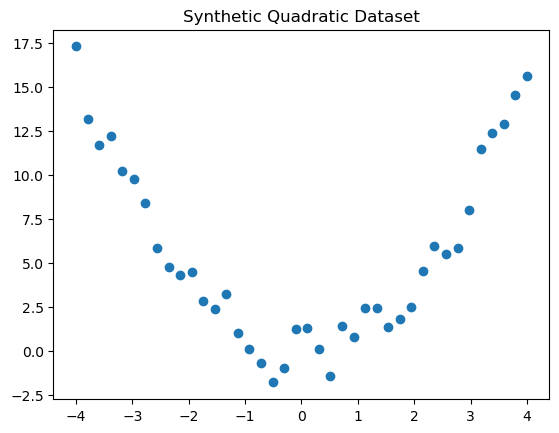

In [37]:
x = np.linspace(-4, 4, 40)
def quad_x(x): return x**2 + np.random.normal(size = len(x))
plt.scatter(x, quad_x(x))
plt.title('Synthetic Quadratic Dataset');

In [38]:
#polynomial kernel
ktrain = polynomial_kernel(x.reshape(-1, 1), x.reshape(-1, 1), degree = 2)
#fit regressor on kernel data
lr = LinearRegression().fit(ktrain, quad_x(x))

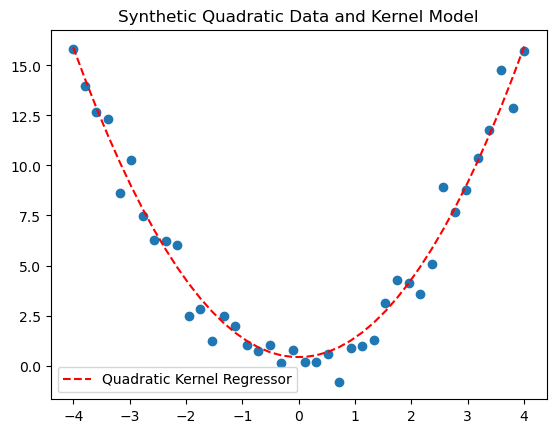

In [39]:
#visualize the predictions
plt.plot(x, lr.predict(ktrain), '--r', label = 'Quadratic Kernel Regressor')
plt.scatter(x, quad_x(x))
plt.title('Synthetic Quadratic Data and Kernel Model')
plt.legend();

#### Loading the Wine Data

The wine data is loaded and the `X`, `y` variables created to use in applying the kernels for classification models below.

In [40]:
X, y = load_wine(return_X_y=True, as_frame=True)
X, y = X[['total_phenols', 'color_intensity']].values, y

### Problem 1

#### Logistic Regression with Linear Kernel

Below, build a transformed version of the data under a first degree polynomial kernel.  Assign the transformed data as `ktrain` below. Use the transformed data to build a `LogisticRegression` estimator with `max_iter = 1000` named `linear_logistic`, and examine the accuracy score of the estimator.  

HINT: although the example above reshapes the data, there is no need to reshape the data in this execise.

In [41]:
ktrain = polynomial_kernel(X, X, degree = 1)
linear_logistic = LogisticRegression(max_iter = 1000).fit(ktrain, y)

print(linear_logistic.score(ktrain, y))

0.8820224719101124


### Problem 2

#### Logistic Regression with Cubic Kernel

Below, build a transformed version of the data under a third degree polynomial kernel. Assign the transformed data as `ktrain_cubic` below. Use the transformed data to build a `LogisticRegression` estimator with `max_iter = 1000` named `cubic_logistic`, and examine the accuracy score of the estimator.

In [42]:
ktrain_cubic = polynomial_kernel(X,X,degree = 3)
ktrain_cubic

array([[  9031.13880975,   4966.6009563 ,   9178.68986391, ...,
         32737.289599  ,  25766.47674266,  26500.90720514],
       [  4966.6009563 ,   2805.27918702,   5043.49501393, ...,
         16473.82941488,  13066.29699565,  13590.74831889],
       [  9178.68986391,   5043.49501393,   9328.90288494, ...,
         33367.58835738,  26256.33407505,  26994.60035999],
       ...,
       [ 32737.289599  ,  16473.82941488,  33367.58835738, ...,
        159961.96319161, 123073.11173589, 121653.44248242],
       [ 25766.47674266,  13066.29699565,  26256.33407505, ...,
        123073.11173589,  94857.80934399,  94017.92873952],
       [ 26500.90720514,  13590.74831889,  26994.60035999, ...,
        121653.44248242,  94017.92873952,  93708.12446241]],
      shape=(178, 178))

In [43]:
cubic_logistic = LogisticRegression(max_iter = 1000).fit(ktrain_cubic,y)
cubic_logistic

/opt/miniconda3/envs/Linlin/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [44]:
print(cubic_logistic.score(ktrain_cubic, y))

0.9157303370786517


### Problem 3

#### Logistic Regression with Gaussian Kernel

Below, build a transformed version of the data under a gaussian kernel -- `rbf_kernel`. Assign the transformed data as `ktrain_rbf` below. Use the transformed data to build a `LogisticRegression` estimator named `rbf_logistic`, and examine the accuracy score of the estimator.

In [48]:
ktrain_rbf = rbf_kernel(X, X)
rbf_logistic = LogisticRegression().fit(ktrain_rbf, y)

print(rbf_logistic.score(ktrain_rbf, y))

0.9101123595505618
